In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import cvxpy as cvx
from pprint import pprint
from random import shuffle

from contagion import binarize_probabilities, distribute_liabilities, make_connections, DeterministicNetwork

In [2]:
cash_vector = np.random.normal(10000, 10000, 100)
cash_vector[cash_vector <= 0] = 1*10**-10
# cash_vector[cash_vector > 5000] = 6500
cash_to_connectivity = lambda x: np.log(x).astype(int)
connectivity_vector = cash_to_connectivity(cash_vector)

In [3]:
# Make the adjacency matrix
mat = make_connections(connectivity_vector)
mat = binarize_probabilities(mat)

# Distribute liabilities
leverage_ratios = np.random.normal(10, 2, 100)
leverage_ratios[leverage_ratios < 5] = 5

liabilities = np.multiply(cash_vector, leverage_ratios)
mat = distribute_liabilities(mat, liabilities)
for i, cash in enumerate(cash_vector):
    mat[i, i] = cash

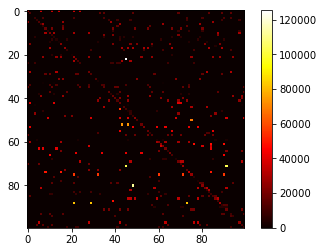

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(mat, interpolation='nearest', cmap=plt.cm.hot)
plt.colorbar()
plt.show()